# Example from the Vistula catchment in Poland

The Vistula catchment is the largest catchment in Poland, with an area of 194,424 km2. This notebook shows how a hydrolgoical model can evaluated using ModelSkill.  

In [1]:
from pathlib import Path
import modelskill as ms
import pandas as pd

In [2]:
fldr = Path("../../tests/testdata/WaterResources/Vistula")
df = pd.read_csv(fldr / "stations.csv", index_col=0)
df

,Station,Long,Lat,Area
Id,,,,
999999,DownStreamRiver (DownStreamPoint),18.95200,54.23100,192632.1
6458010,VISTULA (TCZEW),18.80556,54.08722,193922.9
6458560,BRDA (TUCHOLA),17.90361,53.57306,2477.2
6458500,VISTULA (WARSAW (WARSZAWA)),21.03250,52.24750,84945.1
6458753,PILICA (PRZEDBORZ),19.87528,51.08944,2550.1
6458715,WIEPRZ (LUBARTOW),22.64361,51.49806,6389.8
6458713,WIEPRZ (KRASNYSTAW),23.17667,50.98528,3010.2
6458520,KAMIENNA (KUNOW),21.27889,50.96194,1110.4
6458460,VISTULA (SANDOMIERZ),21.74611,50.67250,31809.9


In [3]:
def get_comparer(df, mods, id):
    """Helper function to get a Comparer object for a given model and station id"""
    q = ms.Quantity(name="Discharge", unit="m3/s")

    # create Observation object
    dfd = pd.read_csv(fldr / mods[0] / f"{id}.csv", index_col=0, parse_dates=True)
    o = ms.PointObservation(dfd, item="Qobs", name=df.loc[id].Station, x=df.loc[id].Long, y=df.loc[id].Lat, quantity=q)
    
    # create ModelResult objects
    mm = []
    for m in mods:
        dfd = pd.read_csv(fldr / m / f"{id}.csv", index_col=0, parse_dates=True)
        mm.append(ms.PointModelResult(dfd, item="Qsim", name=m, quantity=q))
    
    return ms.compare(obs=o, mod=mm)

In [4]:
# def get_comparer_from_matched(df, mod, id):
#     """Helper function to get a Comparer object for a given model and station id"""
#     q = ms.Quantity(name="Discharge", unit="m3/s")
#     dfd = pd.read_csv(fldr / mod / f"{id}.csv", index_col=0, parse_dates=True)
#     dfd = dfd.rename(columns={"Qsim": mod, "Qobs": df.loc[id].Station})
#     cmp = ms.from_matched(dfd, obs_item=df.loc[id].Station, mod_items=[mod], quantity=q)
#     cmp.data.attrs['x'] = df.loc[id].Long
#     cmp.data.attrs['y'] = df.loc[id].Lat
#     cmp.data.attrs['area'] = df.loc[id].Area
#     return cmp

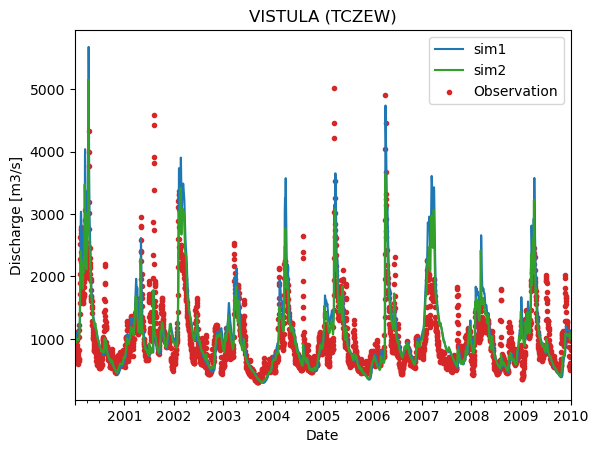

In [5]:
# test for a single station
get_comparer(df, ["sim1","sim2"], df.index[1]).plot.timeseries();

In [6]:
# loop through all stations in df and create a cmp for each
cmps = []
for id in df.index:
    try:
        cmp = get_comparer(df, ["sim1","sim2"], id)
        cmps.append(cmp)
    except:
        pass
cc = ms.comparison.ComparerCollection(cmps)
cc   

<ComparerCollection>
Comparer: DownStreamRiver (DownStreamPoint)
Comparer: VISTULA (TCZEW)
Comparer: BRDA (TUCHOLA)
Comparer: VISTULA (WARSAW (WARSZAWA))
Comparer: PILICA (PRZEDBORZ)
Comparer: WIEPRZ (LUBARTOW)
Comparer: WIEPRZ (KRASNYSTAW)
Comparer: KAMIENNA (KUNOW)
Comparer: VISTULA (SANDOMIERZ)
Comparer: VISTULA (SZCZUCIN)
Comparer: DUNAJEC (NOWY SACZ)
Comparer: POPRAD (CHMELNICA)
Comparer: WISLOK (TRYNCZA)
Comparer: PISA (PTAKI)
Comparer: NAREW (SURAZ)
Comparer: LIWIEC (LOCHOW)
Comparer: KRZNA (MALOWA GORA)

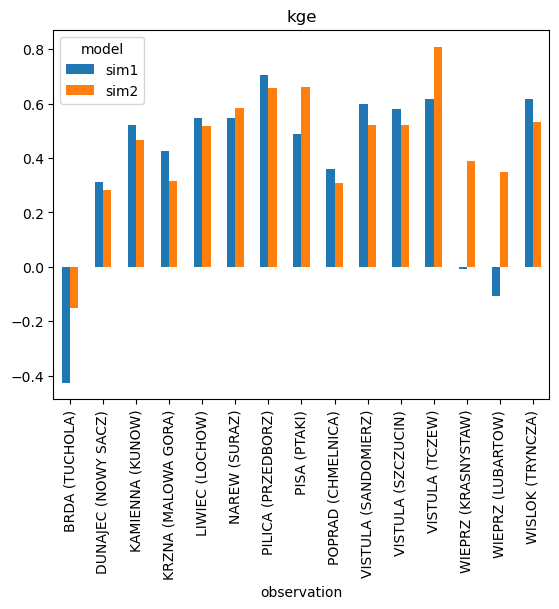

In [7]:
cc.skill(metrics="kge").plot.bar("kge");